In [1]:
import numpy as np
from fxpmath import Fxp
import matplotlib.pyplot as plt
from FPGAJacobi.Cordic import Cordic

## Rotation


In [2]:
N_WORD = 20
N_FRAC = 15
IS_SIGNED = True
MODE = "rotation"
N_ITER = 15
K =  0.607252935
x = Fxp(1, IS_SIGNED, N_WORD, N_FRAC)
y = Fxp(0, IS_SIGNED, N_WORD, N_FRAC)
z = Fxp(np.pi/3, IS_SIGNED, N_WORD, N_FRAC)

cordic = Cordic(mode = MODE, 
                n_iterations = 12, 
                n_word = 17, 
                n_frac = 15, 
                is_signed = True)

In [3]:
x_out, y_out, z_out = cordic.run(x, y, z)
print("cos = {val}".format(val = x_out))
print("sin = {val}".format(val = y_out))

cos = 0.500213623046875
sin = 0.86590576171875


### Irrelevant, experiments

In [4]:
x = Fxp(1, IS_SIGNED, N_WORD, N_FRAC)
y = Fxp(0, IS_SIGNED, N_WORD, N_FRAC)
z = Fxp(np.pi/3, IS_SIGNED, N_WORD, N_FRAC)

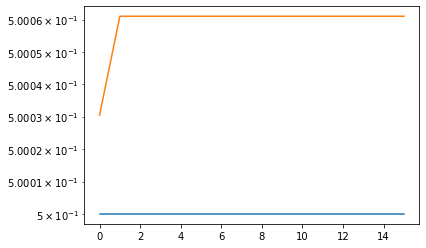

In [6]:
#result vs number of iter
reference = np.zeros(32)
cordic = np.zeros(32)
for i in range(1,32):
    reference[i] = np.cos(np.pi/3)
    cordic[i] = Cordic("rotation", i, N_WORD, N_FRAC, True).run(x,y,z)[0]
plt.semilogy(reference[16:])
plt.semilogy(cordic[16:])
plt.show()

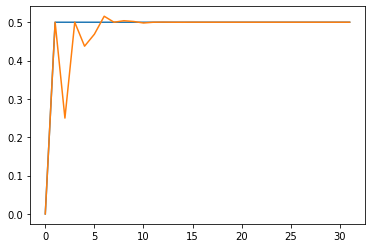

In [ ]:
#result vs number of bits
reference = np.zeros(32)
cordic = np.zeros(32)
for i in range(1,32):
    x = Fxp(1, IS_SIGNED, i+2, i)
    y = Fxp(0, IS_SIGNED, i+2, i)
    z = Fxp(np.pi/3, IS_SIGNED, i+2, i)
    reference[i] = np.cos(np.pi/3)
    cordic[i] = Cordic("rotation", i, i+2, i, True).run(x,y,z)[0]
plt.plot(reference[12:])
plt.plot(cordic[12:])
plt.show()

## Vectoring

In [49]:
N_WORD = 18
N_FRAC = 15
IS_SIGNED = True
MODE = "vectoring"
N_ITER = 12
K =  0.607252935
x = Fxp(0.8, IS_SIGNED, N_WORD, N_FRAC)
y = Fxp(0.95, IS_SIGNED, N_WORD, N_FRAC)
z = Fxp(0, IS_SIGNED, N_WORD, N_FRAC)

cordic = Cordic(mode = MODE, 
                n_iterations = 12, 
                n_word = 18, 
                n_frac = 15, 
                is_signed = True)

In [50]:
x_out, y_out, z_out = cordic.run(x,y,z)
print("magnitude = {val}".format(val = x_out))
print("arctan = {val}".format(val = z_out))
z_out.info(verbose=3)

magnitude = 1.241943359375
arctan = 0.87042236328125
	dtype		=	fxp-s18/15
	Value		=	0.87042236328125

	Signed		=	True
	Word bits	=	18
	Fract bits	=	15
	Int bits	=	2
	Val data type	=	<class 'float'>

	Upper		=	3.999969482421875
	Lower		=	-4.0
	Precision	=	3.0517578125e-05
	Overflow	=	saturate
	Rounding	=	trunc
	Shifting	=	expand



In [50]:
arr = np.random.rand(3,3)
arrfxp = Fxp(np.zeros((3,3)), n_word = 16, n_frac = 15, signed = True)
arrfxp2 = Fxp(np.zeros((3,3)), n_word = 17, n_frac = 15, signed = True) 
arrfxp.set_val(arr)
arrfxp2.equal(arrfxp)
arrfxp2[1,2] = 3
print(arr)
print(arrfxp)
arrfxp2

[[0.74788944 0.14665997 0.88288654]
 [0.51845061 0.17066077 0.6041508 ]
 [0.23953802 0.00970692 0.17696373]]
[[0.74786377 0.14663696 0.88287354]
 [0.51843262 0.1706543  0.60412598]
 [0.23953247 0.00970459 0.17694092]]


fxp-s17/15([[0.74786377 0.14663696 0.88287354]
            [0.51843262 0.1706543  1.99996948]
            [0.23953247 0.00970459 0.17694092]])

In [2]:
arctan = Fxp(np.array([np.arctan(1/(2**i)) for i in range(16)]),
                     n_word=20, n_frac=15, signed=True, rounding = "around")

In [7]:
np.set_printoptions(suppress=True)
print(arctan.hex())

['0x06488', '0x03B59', '0x01F5B', '0x00FEB', '0x007FD', '0x00400', '0x00200', '0x00100', '0x00080', '0x00040', '0x00020', '0x00010', '0x00008', '0x00004', '0x00002', '0x00001']
